## "Predicting House Prices in Indian Metropolitan Cities: A Comprehensive Analysis and Price Forecasting Model"

## "House Price Prediction Model for Bangalore, India"

#### Components of the House Price Prediction Model:

1. Importing Dependencies
2. Data Importing 
3. Preprocessing 
4. Visualization 
5. Standardizing the Data
6. Label Encoding
7. Model Training
8. Model Deployment

#### 1. Importing dependencies.

We imported NumPy and Pandas for data handling, Matplotlib and Seaborn for visualization, and essential machine learning tools such as RandomForestRegressor and XGBRegressor for predictive modeling. Additionally, we included preprocessing tools like StandardScaler and LabelEncoder for data preprocessing and evaluation metrics like r2_score for assessing model performance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle

#### 2. Importing Bangalore House Price Dataset.

In [2]:
data = pd.read_csv('C:/Users/aksha/OneDrive/Documents/SRM_Internship_project/Indian_cities/Bangalore.csv')

#### 3. Preprocessing

3.1 We quickly review a subset of the dataset using to gain insights into its contents.

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


##### Overview of Each Column:

1. **Price**: Target variable representing the price of the property.
2. **Area**: Non-categorical column indicating the area (size) of the property.
3. **Location**: Non-categorical column indicating the location of the property.
4. **No. of Bedrooms**: Number of bedrooms in the property.
5. **Resale**: Binary indicator (0 or 1) representing whether the property is a resale.
6. **MaintenanceStaff**: Binary indicator representing the availability of maintenance staff.
7. **Gymnasium**: Binary indicator representing the availability of a gymnasium.
8. **SwimmingPool**: Binary indicator representing the availability of a swimming pool.
9. **LandscapedGardens**: Binary indicator representing the availability of landscaped gardens.
10. **JoggingTrack**: Binary indicator representing the availability of a jogging track.
11. **RainWaterHarvesting**: Binary indicator representing the availability of rainwater harvesting.
12. **IndoorGames**: Binary indicator representing the availability of indoor games facilities.
13. **ShoppingMall**: Binary indicator representing the proximity to a shopping mall.
14. **Intercom**: Binary indicator representing the availability of an intercom system.
15. **SportsFacility**: Binary indicator representing the availability of sports facilities.
16. **ATM**: Binary indicator representing the proximity to an ATM.
17. **ClubHouse**: Binary indicator representing the availability of a clubhouse.
18. **School**: Binary indicator representing the proximity to a school.
19. **24X7Security**: Binary indicator representing the availability of 24x7 security.
20. **PowerBackup**: Binary indicator representing the availability of power backup.
21. **CarParking**: Binary indicator representing the availability of car parking.
22. **StaffQuarter**: Binary indicator representing the availability of staff quarters.
23. **Cafeteria**: Binary indicator representing the availability of a cafeteria.
24. **MultipurposeRoom**: Binary indicator representing the availability of a multipurpose room.
25. **Hospital**: Binary indicator representing the proximity to a hospital.
26. **WashingMachine**: Binary indicator representing the availability of a washing machine.
27. **Gasconnection**: Binary indicator representing the availability of a gas connection.
28. **AC**: Binary indicator representing the availability of air conditioning.
29. **Wifi**: Binary indicator representing the availability of Wi-Fi.
30. **Children'splayarea**: Binary indicator representing the availability of a children's play area.
31. **LiftAvailable**: Binary indicator representing the availability of a lift.
32. **BED**: Binary indicator representing the availability of a bed.
33. **VaastuCompliant**: Binary indicator representing whether the property is Vaastu compliant.
34. **Microwave**: Binary indicator representing the availability of a microwave.
35. **GolfCourse**: Binary indicator representing the proximity to a golf course.
36. **TV**: Binary indicator representing the availability of a television.
37. **DiningTable**: Binary indicator representing the availability of a dining table.
38. **Sofa**: Binary indicator representing the availability of a sofa.
39. **Wardrobe**: Binary indicator representing the availability of a wardrobe.
40. **Refrigerator**: Binary indicator representing the availability of a refrigerator.

In this dataset, 'Price' is the target variable we aim to predict, while 'Area' and 'Location' are the non-categorical columns. All other columns represent categorical variables indicating various features or amenities of the properties.


3.2 We're counting how many rows and columns there are in the dataset.

In [4]:
data.shape

(1951, 40)

- No of rows in dataset = 1951
- No of columns in dataset = 40

3.3 Stroing name of columns in columns variable.
This code snippet iterates through each column in the dataset, excluding 'Price', 'Area', and 'Location'. For each column, it prints the count of unique values and a separator.This code checks if any columns contain only zeros as categorical values and drops them if found.

In [5]:
columns = data.columns

In [6]:
for column in columns:
    if column == 'Price':
        continue
    elif column == 'Area':
       continue
    elif column == 'Location':
       continue
    else:
     print(column)
     print(data[column].value_counts(),'\n========================\n')

No. of Bedrooms
No. of Bedrooms
2    888
3    879
4    101
1     73
5     10
Name: count, dtype: int64 

Resale
Resale
0    1771
1     180
Name: count, dtype: int64 

MaintenanceStaff
MaintenanceStaff
0    1717
1     234
Name: count, dtype: int64 

Gymnasium
Gymnasium
1    1803
0     148
Name: count, dtype: int64 

SwimmingPool
SwimmingPool
1    1645
0     306
Name: count, dtype: int64 

LandscapedGardens
LandscapedGardens
1    1312
0     639
Name: count, dtype: int64 

JoggingTrack
JoggingTrack
1    1400
0     551
Name: count, dtype: int64 

RainWaterHarvesting
RainWaterHarvesting
1    1259
0     692
Name: count, dtype: int64 

IndoorGames
IndoorGames
1    1102
0     849
Name: count, dtype: int64 

ShoppingMall
ShoppingMall
0    1728
1     223
Name: count, dtype: int64 

Intercom
Intercom
1    1545
0     406
Name: count, dtype: int64 

SportsFacility
SportsFacility
1    1000
0     951
Name: count, dtype: int64 

ATM
ATM
0    1708
1     243
Name: count, dtype: int64 

ClubHouse
ClubHou

In entire dataset,There is not a single house which have a facility of Wardrobe and Wifi, It will not have any impact on its price,Thus we are going to drop these columns.

In [7]:
data = data.drop(columns=['Wardrobe','Wifi'])

3.4 Now we will take a look on statistical data

In [8]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
count,1.951000e+03,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000,1951.000000
mean,9.953003e+06,1515.602768,2.532035,0.092260,0.119938,0.924141,0.843157,0.672476,0.717581,0.645310,0.564839,0.114300,0.791902,0.512558,0.124552,0.719631,0.117888,0.709380,0.904152,0.580728,0.221425,0.208611,0.554587,0.056894,0.125577,0.199385,0.128139,0.896976,0.850846,0.127114,0.445413,0.125577,0.033316,0.125577,0.125577,0.125577,0.125577
std,1.293016e+07,764.069332,0.677002,0.289467,0.324973,0.264840,0.363746,0.469431,0.450292,0.478542,0.495905,0.318257,0.406052,0.499970,0.330294,0.449295,0.322558,0.454165,0.294459,0.493566,0.415312,0.406420,0.497139,0.231699,0.331457,0.399640,0.334331,0.304068,0.356332,0.333186,0.497139,0.331457,0.179507,0.331457,0.331457,0.331457,0.331457
min,2.096000e+06,525.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.973500e+06,1147.000000,2.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.950000e+06,1330.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000e+07,1610.000000,3.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.027000e+08,9900.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                1951 non-null   int64 
 1   Area                 1951 non-null   int64 
 2   Location             1951 non-null   object
 3   No. of Bedrooms      1951 non-null   int64 
 4   Resale               1951 non-null   int64 
 5   MaintenanceStaff     1951 non-null   int64 
 6   Gymnasium            1951 non-null   int64 
 7   SwimmingPool         1951 non-null   int64 
 8   LandscapedGardens    1951 non-null   int64 
 9   JoggingTrack         1951 non-null   int64 
 10  RainWaterHarvesting  1951 non-null   int64 
 11  IndoorGames          1951 non-null   int64 
 12  ShoppingMall         1951 non-null   int64 
 13  Intercom             1951 non-null   int64 
 14  SportsFacility       1951 non-null   int64 
 15  ATM                  1951 non-null   int64 
 16  ClubHo

key observations:

1. The 'Location' column is the only one with a data type of 'object', while all other columns are of type 'int'.
2. The lowest price recorded in the dataset is 2 million INR.
3. The highest price recorded in the dataset is 202 million INR.
4. The smallest area of a house in the dataset is 525 square units.
5. The largest area of a house in the dataset is 99,000 square units.

3.5 Checking Is there any null values.

In [10]:
data.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Refrigerator           0
dtype: int64

3.6 'Counting Houses by Location'

In [11]:
pd.set_option('display.max_rows', None)
data.Location.value_counts()

Location
RR Nagar                                   143
Begur                                       96
Electronic City Phase 1                     74
Bommasandra                                 69
Electronic City Phase 2                     69
Whitefield Hope Farm Junction               65
Varthur                                     59
Kanakapura Road Beyond Nice Ring Road       49
Horamavu                                    46
Narayanapura on Hennur Main Road            45
Krishnarajapura                             45
JP Nagar Phase 3                            43
Anagalapura Near Hennur Main Road           40
Kannur on Thanisandra Main Road             37
ITPL                                        35
Harlur                                      35
Hebbal                                      34
Attibele                                    33
JP Nagar Phase 8                            31
Muneshwara Nagar                            28
Jalahalli                                   28
Deva

3.7 Identifying Outliers: Locations with Few Houses
Many locations have only a few houses, which may act as outliers in the data and potentially impact our model's performance. To address this, we will group locations with fewer than 11 houses together and categorize them under a separate variable.

In [12]:
location_count = data['Location'].value_counts()
location_count_less_10 = location_count[location_count<=10]

In [13]:
data['Location'] = data['Location'].apply(lambda x: 'other' if x in location_count_less_10 else x)
data['Location'].value_counts()

Location
other                                      213
RR Nagar                                   143
Begur                                       96
Electronic City Phase 1                     74
Bommasandra                                 69
Electronic City Phase 2                     69
Whitefield Hope Farm Junction               65
Varthur                                     59
Kanakapura Road Beyond Nice Ring Road       49
Horamavu                                    46
Narayanapura on Hennur Main Road            45
Krishnarajapura                             45
JP Nagar Phase 3                            43
Anagalapura Near Hennur Main Road           40
Kannur on Thanisandra Main Road             37
Harlur                                      35
ITPL                                        35
Hebbal                                      34
Attibele                                    33
JP Nagar Phase 8                            31
Muneshwara Nagar                            28
Deva

#### 4. Visualization

4.1 This code generates a heatmap to visualize the correlation between different features in the dataset, excluding the 'Location' column. Each cell in the heatmap represents the correlation coefficient between two features, with annotations provided to indicate the strength of correlation.

In [14]:
corr_data = data.drop(columns='Location')

In [15]:
corr = corr_data.corr()

<Axes: >

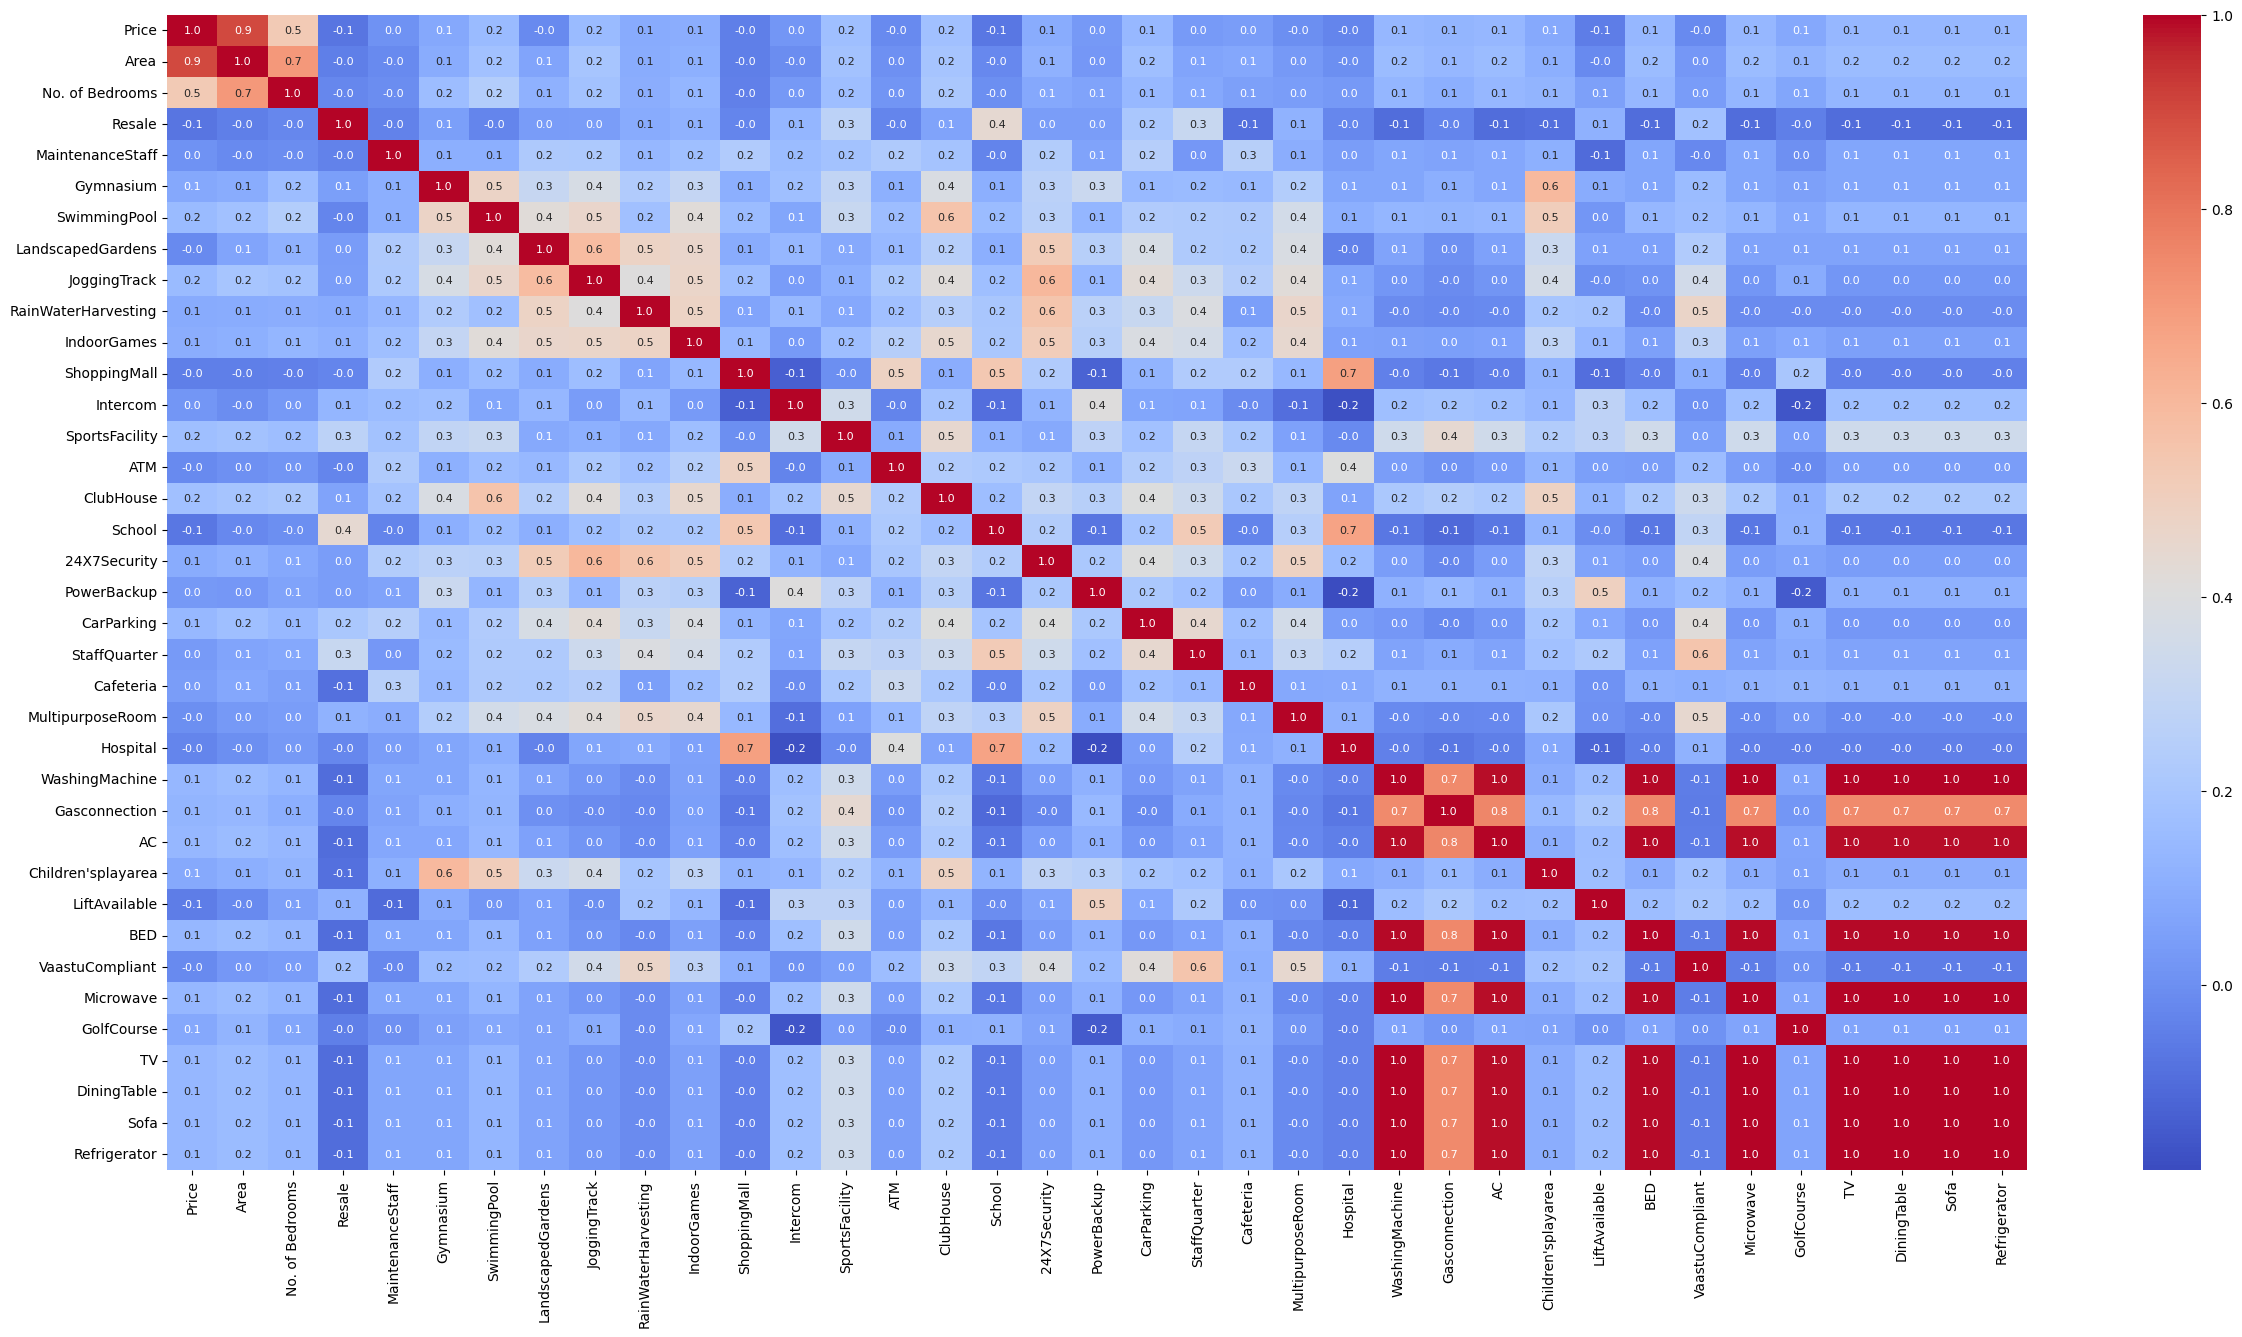

In [16]:
plt.figure(figsize=(30,15))
sns.heatmap(corr,fmt='.1f',annot=True,annot_kws={'size':8} ,cmap='coolwarm')

#### Insights from the Heat Map:

1. Dark brown color indicates strong positive correlation, while lighter brown or blue colors signify weaker positive correlation. Dark blue represents strong negative correlation.

2. For example:
   - There is a strong positive correlation between 'Sofa' and 'TV', which is expected as these items are often found together in a household.
   - Like this We can see positive or negative correlation between various features.

4.2 Taking insights from bar plot of all categorical columns

In [17]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Children'splayarea', 'LiftAvailable', 'BED',
       'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV', 'DiningTable',
       'Sofa', 'Refrigerator'],
      dtype='object')

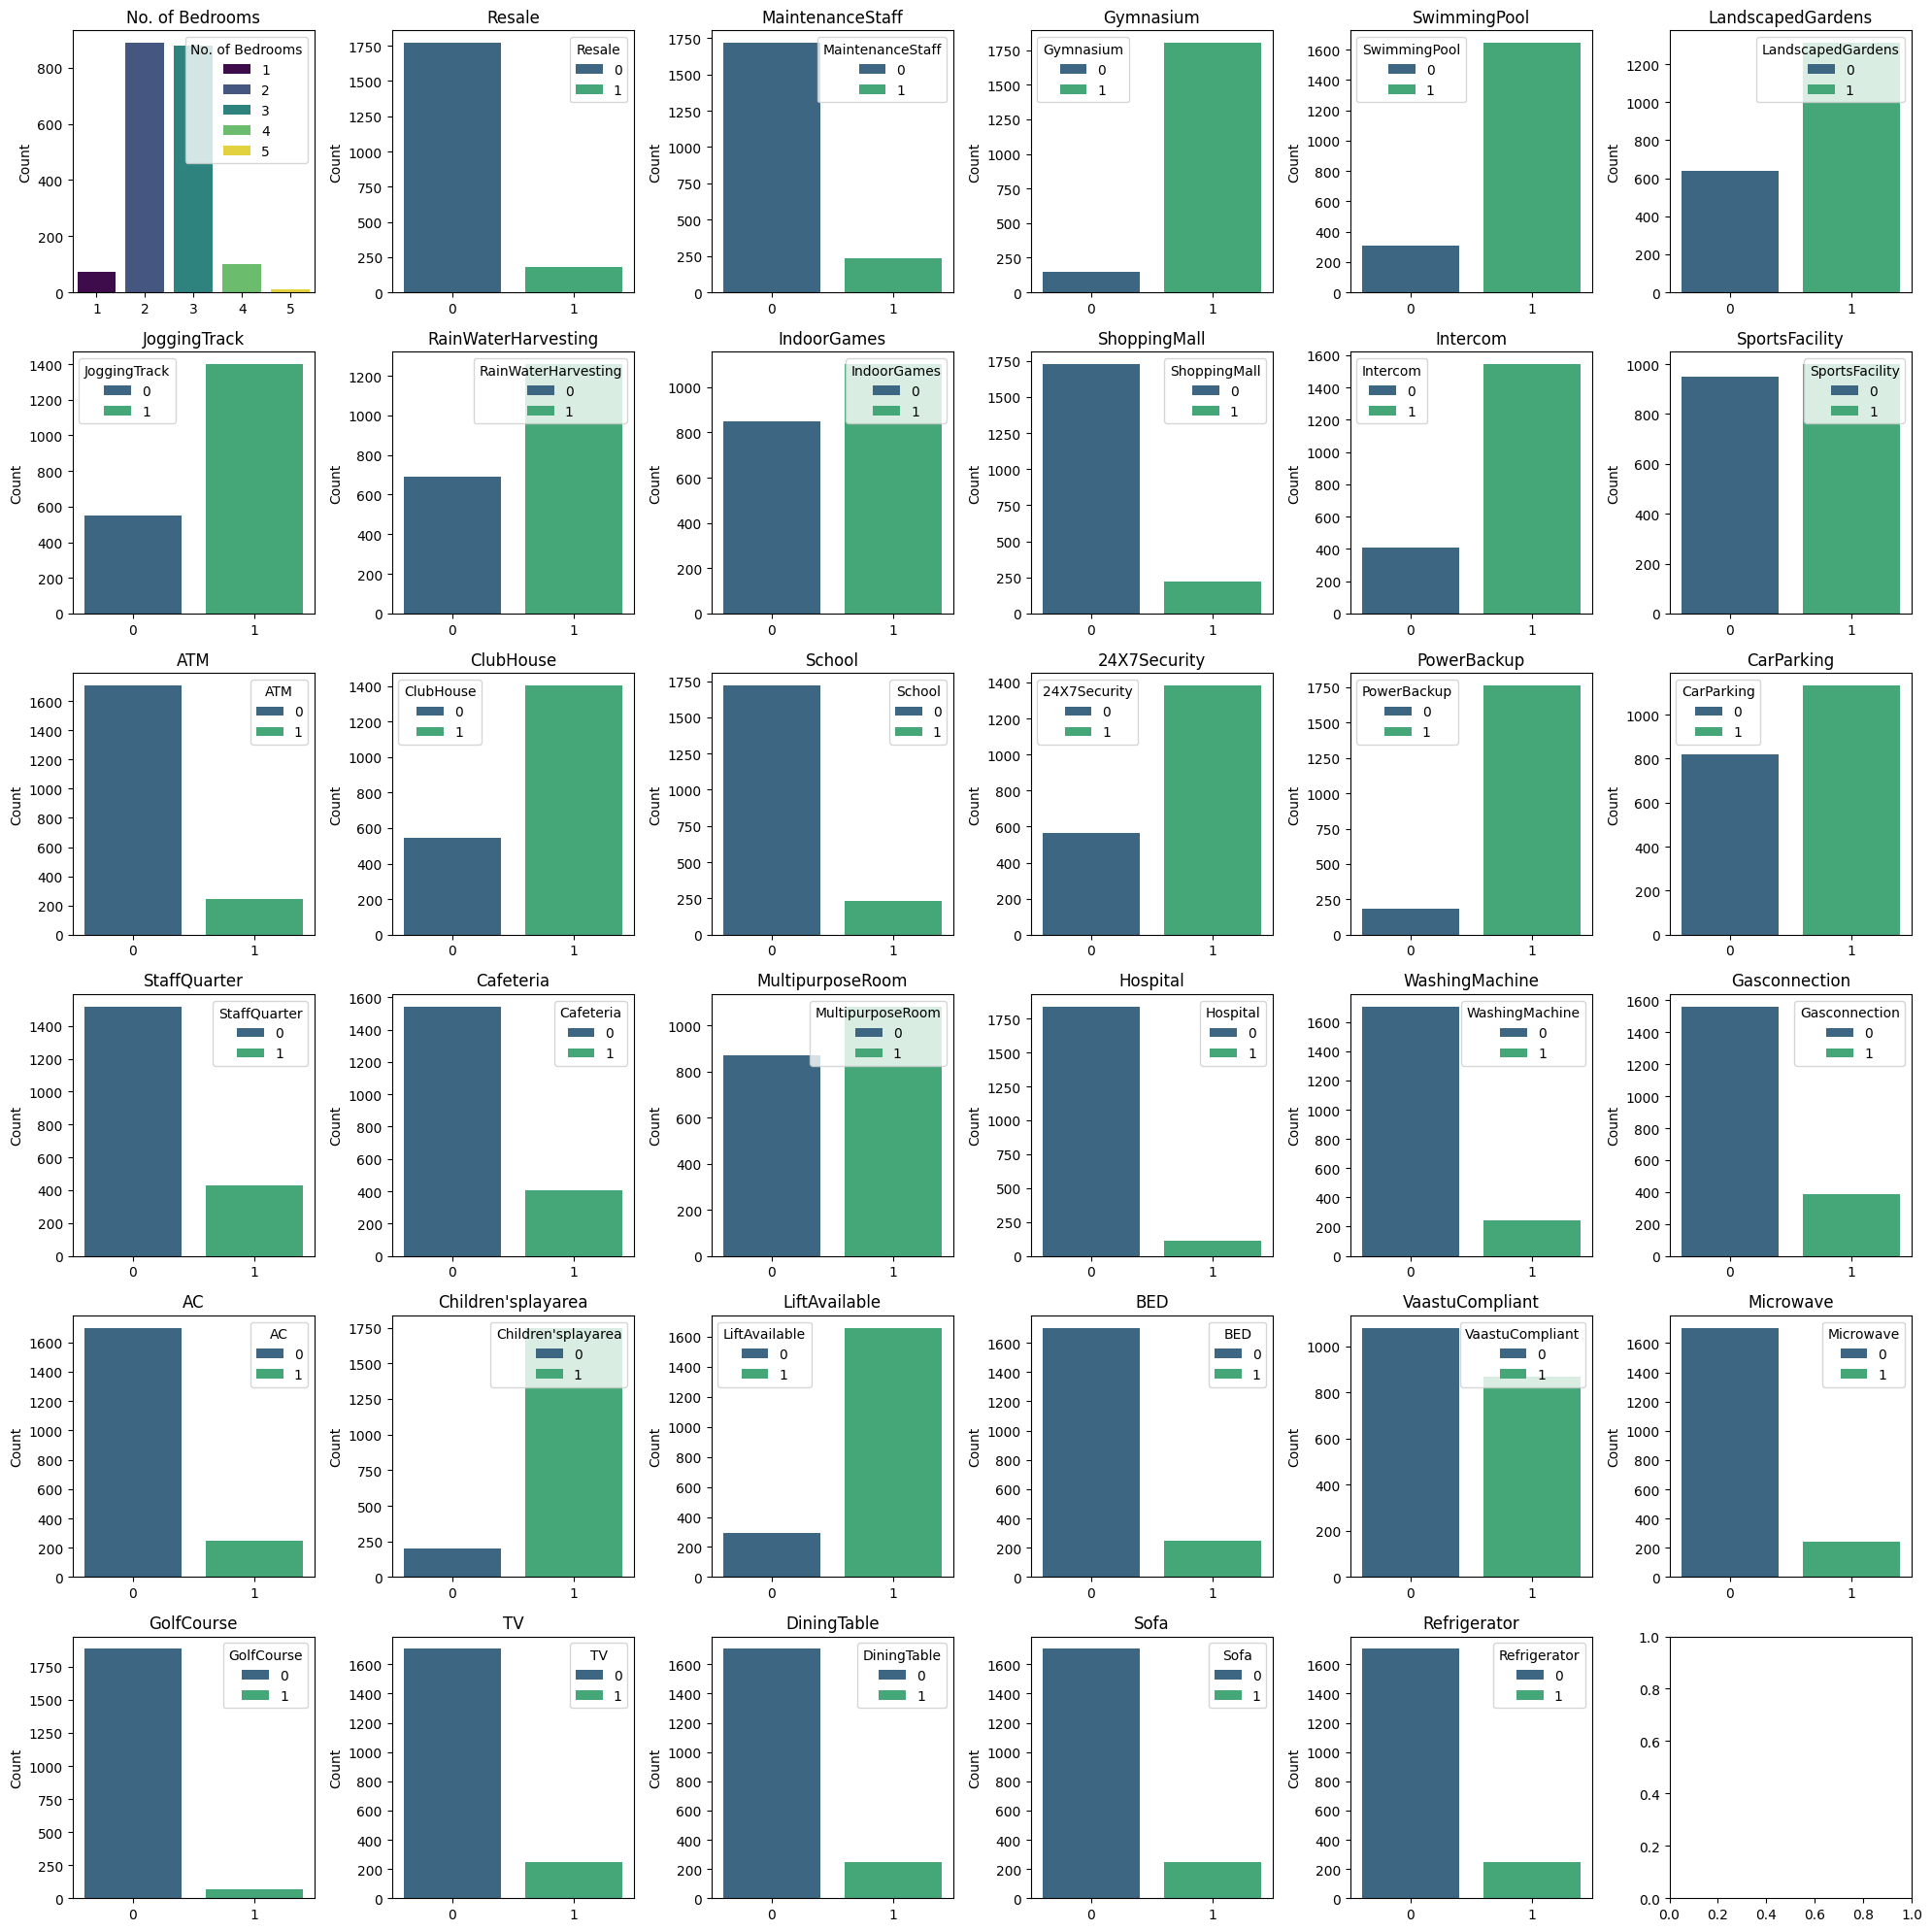

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the categorical columns
categorical_columns = ['No. of Bedrooms', 'Resale', 'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
                       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall', 'Intercom', 'SportsFacility',
                       'ATM', 'ClubHouse', 'School', '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
                       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine', 'Gasconnection', 'AC',
                       "Children'splayarea", 'LiftAvailable', 'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse',
                       'TV', 'DiningTable', 'Sofa', 'Refrigerator']

# Plotting count plots for each categorical variable
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(20, 20))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=data, ax=axes[i//6, i%6],palette='viridis',hue=column)
    axes[i//6, i%6].set_title(column)
    axes[i//6, i%6].set_xlabel('')
    axes[i//6, i%6].set_ylabel('Count')

plt.tight_layout()
plt.show()


#### Insights from Count Graphs:

1. The dataset includes houses with a varying number of rooms, ranging from 1 to 8.
2. Observing the count plots for features such as 'Hospital','Golfcourse','Gymnasium', we notice significant uneven distribution or skewness in the data.
means all this facility are not provided in most of cases while purchasing of a housing.

4.3 "Plotting a Bar Graph: Mean House Prices by Location"

C:\Users\aksha\AppData\Local\Temp\ipykernel_19336\154861719.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Price', data=average_prices,palette='viridis')


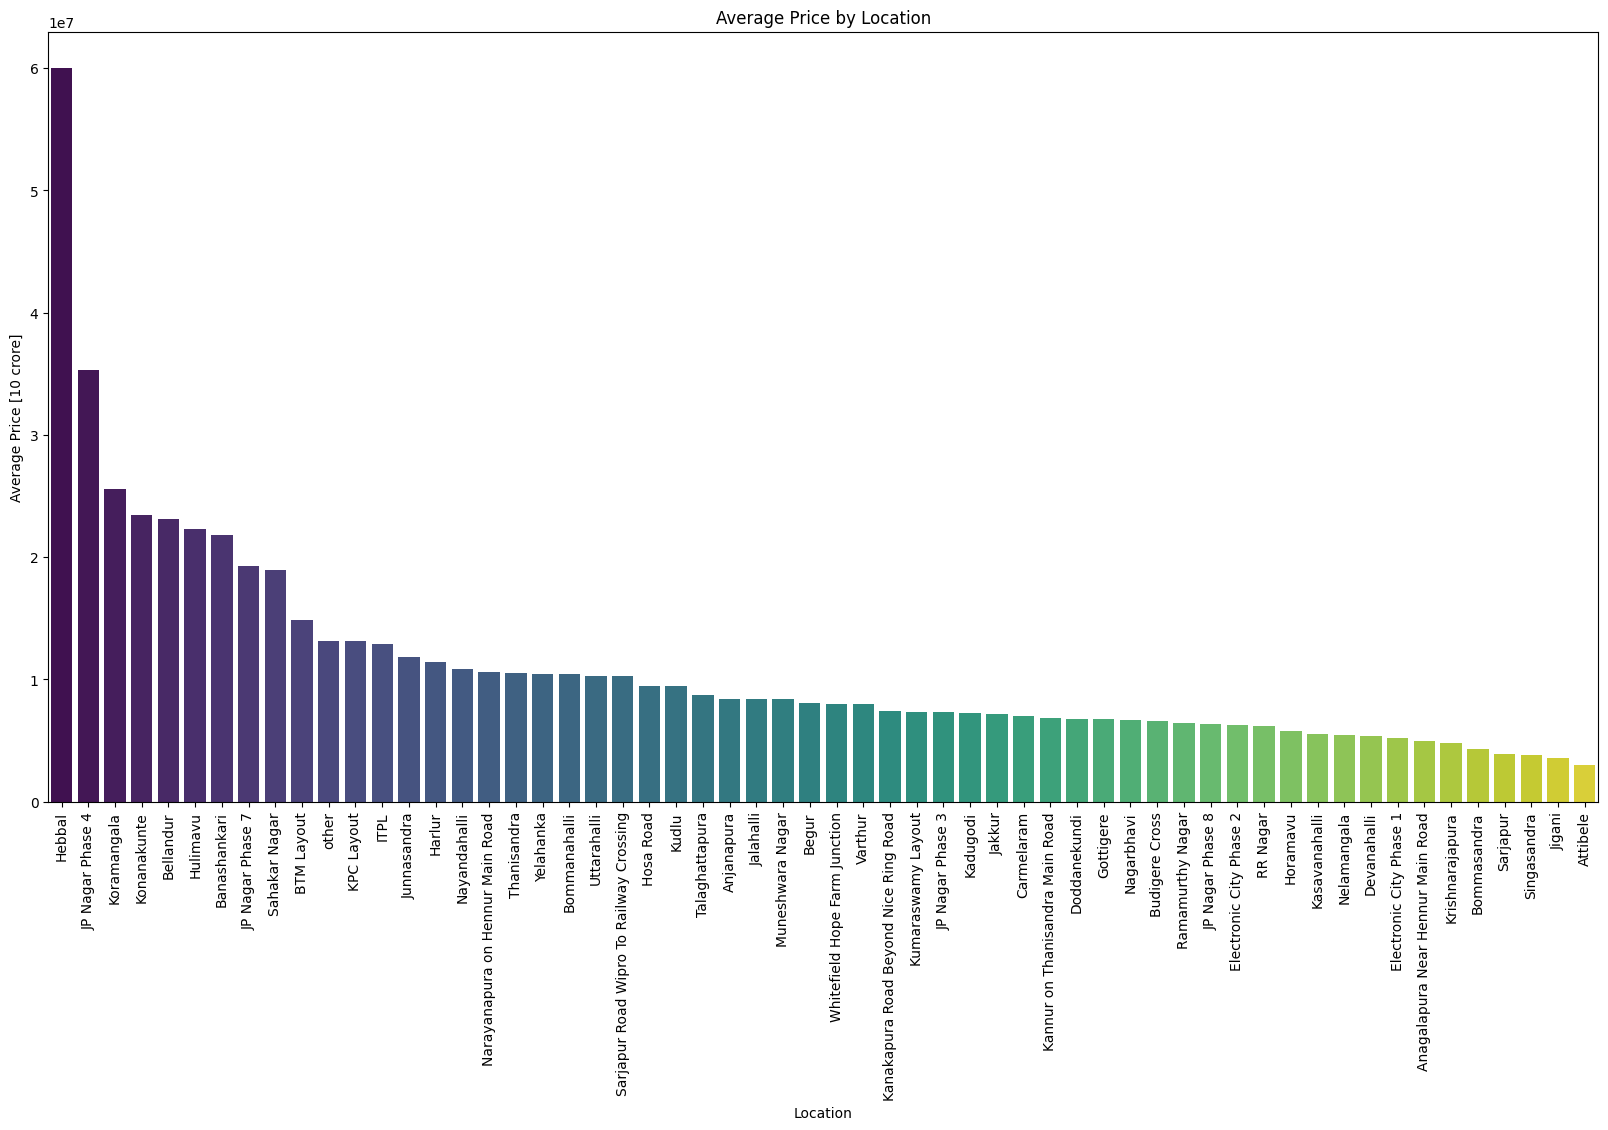

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by location (e.g., by taking the mean price for each location)
average_prices = data.groupby('Location')['Price'].mean().reset_index()

# Sort the data by average price
average_prices = average_prices.sort_values(by='Price', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x='Location', y='Price', data=average_prices,palette='viridis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location')
plt.ylabel('Average Price [10 crore]')
plt.title('Average Price by Location')
plt.show()


#### Insights:
1. The most affluent areas, such as Banjara Hills, Jubilee Hills, and Madhapur, are likely the luxurious neighborhoods of Bangalore, while areas with the least expensive houses include Krishna Reddy and Adibatla.
2. The majority of house prices fall within the range of 5 million to 15 million INR.

4.4 Line plot showing relation between each feature and price

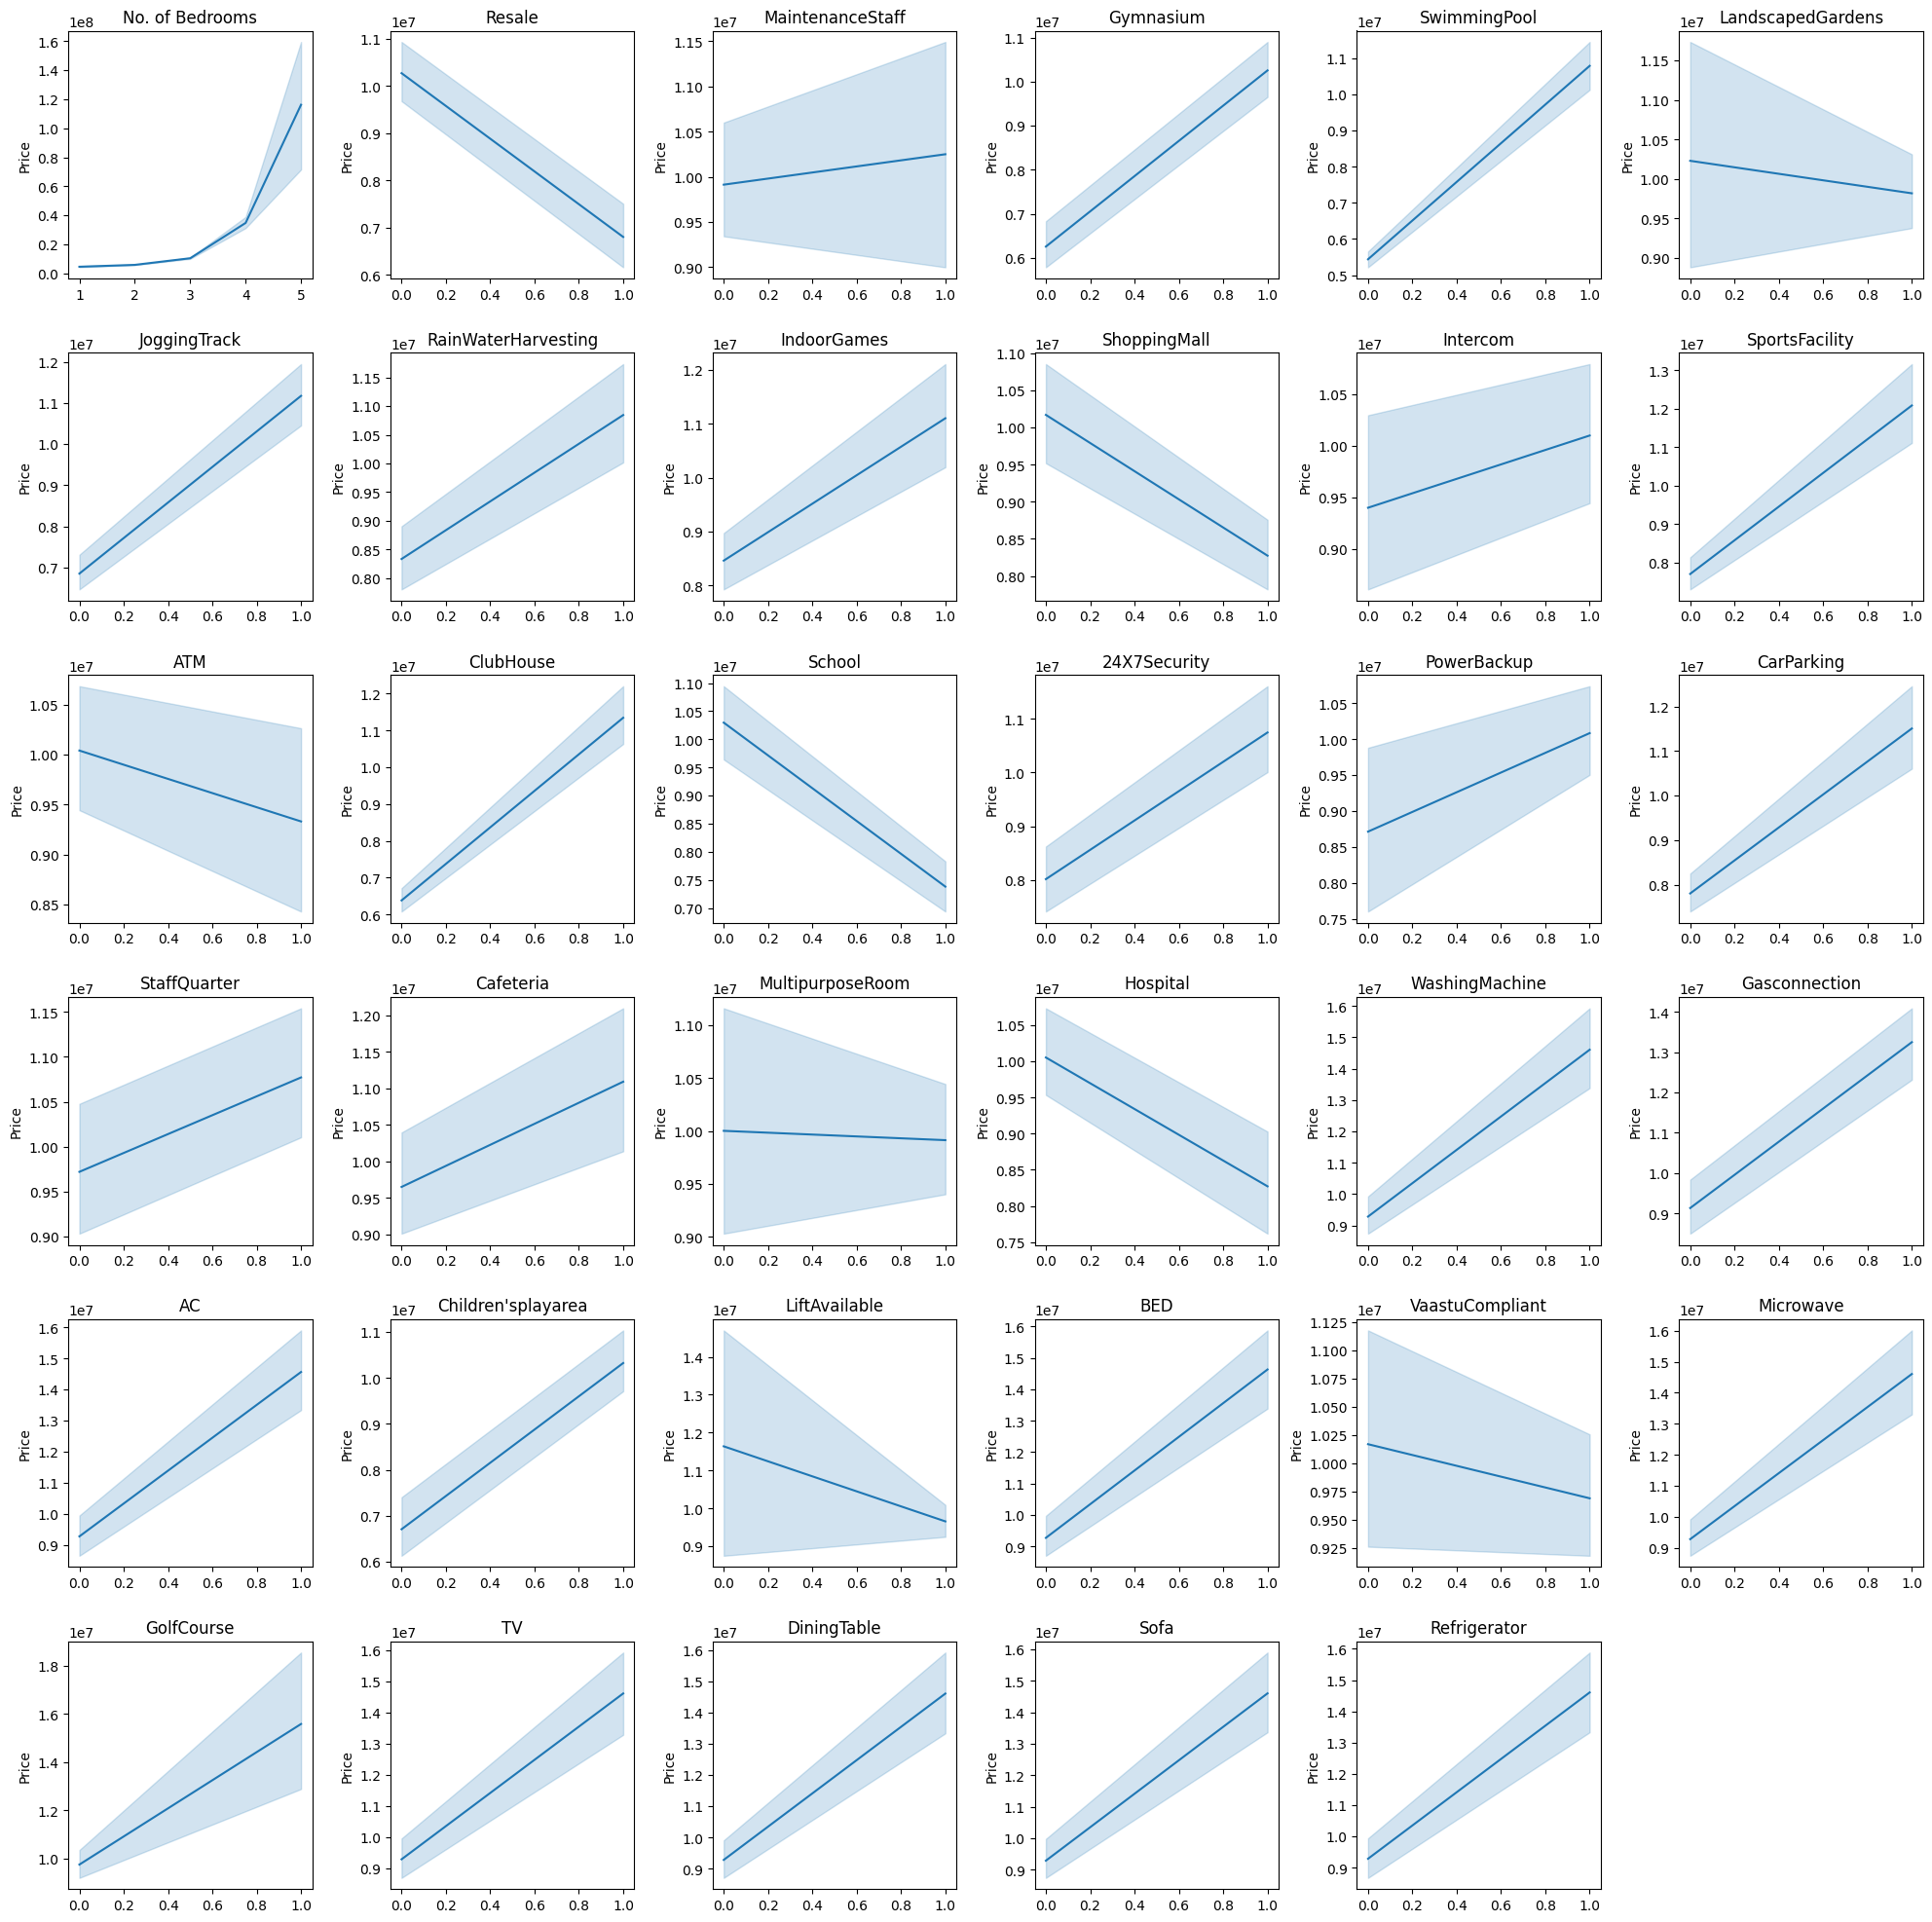

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the figure with appropriate size
plt.figure(figsize=(20, 20))

# Plotting line plots for each categorical variable against Price
for i, column in enumerate(categorical_columns):
    plt.subplot(6, 6, i+1)
    sns.lineplot(x=data[column], y=data['Price'], estimator='mean')  # You can change 'mean' to 'median' if you prefer
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('Price')

plt.tight_layout()
plt.show()



#### Insights:
1. The line plots display shadows, with wider shadows behind the line indicating a higher concentration of data points in that range, and vice versa.
2. The presence or absence of features such as 'MultipurposeRoom','MaintenanceStaff','LandscapedGardens' near the house does not have a significant impact on price. Hence, in the next step, we will drop these columns to simplify the model and reduce complexity.
3. Most features show a positive correlation with price, implying that the presence of any feature tends to increase the price of the house.
4. People of Bangalore are much aware of vaastu, if there any complaint of vastu the price of hoouse decreases.
5. The combined availability of a lift, hospital, school, shopping mall, and ATM could decrease property prices due to increased noise, traffic congestion, security concerns, diminished privacy, potential for higher crime rates, and reduced parking availability.

In [21]:
# multipurpose , maintanance staff, landscape garder
data = data.drop(columns=['MultipurposeRoom','MaintenanceStaff','LandscapedGardens'])

#### 5 Standardizing the Data
5.1 Since we only have the 'Area' column as the feature with numerical or continuous values, we will standardize this column only.

In [22]:
std = StandardScaler()

In [23]:
data['Area'] = std.fit_transform(data[['Area']])

#### 6 LabelEncoding

In [24]:
len(data['Location'].value_counts())

58

6.1 Assigning Numerical Values to Locations
- We have 58 unique locations repeated across all 2434 data points. Label encoding will assign a unique numerical value to each location, facilitating numerical processing by machine learning models. This transformation is crucial as models require numerical input rather than strings, ensuring efficient data interpretation and model performance.

In [25]:
encoder = LabelEncoder()

In [26]:
data['Location'] = encoder.fit_transform(data['Location'])

Splitting Data

In [27]:
x = data.drop(columns='Price',axis=1)
y = data['Price']

In [28]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

#### 7. Model Selection And Training

7.1 Defining Model Evaluation Function:
- We are utilizing two models, RandomForestRegressor and XGBRegressor, to predict housing prices. A function is defined to take features and corresponding labels, assessing their accuracy using the R2 score metric.

In [29]:
models = [RandomForestRegressor(),XGBRegressor()]

def accuracy(columns,target):
    for model in models:
        print(model)
        model.fit(columns,target)
        pred = model.predict(columns)
        accuracy = r2_score(target,pred)
        print('R2 score is ',accuracy,'\n-----------------------------------------------------------------------------')

7.2 Evaluating Models with Train Data:
- Initially, we calculate the R2 score using the training data itself. This step is crucial to ensure that the models do not overfit and can generalize well to unseen data.

In [30]:
print('====================================')
print('CHECHKING ACCURACY SCORES OF MODEL')
print('====================================\n')
accuracy(xtrain,ytrain)

CHECHKING ACCURACY SCORES OF MODEL

RandomForestRegressor()


R2 score is  0.99029539683593 
-----------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 score is  0.9989331862285571 
-----------------------------------------------------------------------------


7.3 Evaluating Models with Train and Test Data:
- Initially, we calculate the R2 score using the training data itself. Similarly, we evaluate the models using the test data to confirm their performance on unseen data.

In [31]:
print('=====================================================================================================================')
print('CHECHKING ACCURACY SCORES OF MODEL')
print('=====================================================================================================================\n')
accuracy(xtest,ytest)

CHECHKING ACCURACY SCORES OF MODEL

RandomForestRegressor()
R2 score is  0.9847882079253627 
-----------------------------------------------------------------------------
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
R2 score is  0.9999714531030359 
-------------------------------------------------

#### Insights- 
In both training and testing data , the accuracy of XGBregressor is high, thus we will take this model for deployment.

7.4 Final model - XGBRegressor

In [32]:
model = XGBRegressor()

In [33]:
model.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

7.5 Testing Model Prediction on Random Data:
- To assess the model's predictive capability, we randomly select a data point using data.sample() and provide its features to our model. We then evaluate whether the model accurately predicts the corresponding label for this data point.

In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.sample()

,Price,Area,Location,No. of Bedrooms,Resale,Gymnasium,SwimmingPool,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,Hospital,WashingMachine,Gasconnection,AC,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Refrigerator
1116,10600000,0.076449,55,3,0,1,1,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0


In [35]:
	
input = [30000000, 'JP Nagar Phase 1', 4, 0, 1, 1, 1, 1,0,0,1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
input[0] = std.transform([[input[0]]])[0][0]
location = input[1]
try:
 input[1] = encoder.transform([location])[0]
except:
 location = 'other'
 input[1] = encoder.transform([location])[0]
len(input)

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


34

In [36]:
input = np.asarray(input).reshape(1,-1)
pred = model.predict(input)
pred

array([1.1230515e+08], dtype=float32)

#### 8 Ready for Deployment
- After thorough testing, our model demonstrates the ability to make accurate predictions. With satisfactory performance, the model is now deemed ready for deployment .

In [37]:
filename = 'Bangalore_model.sav'
pickle.dump(model,open(filename,'wb'))

In [38]:
standard = 'StandardScaler_Bangalore.sav'
pickle.dump(std,open(standard,'wb'))

In [39]:
encoding = 'encoder_bangalore.sav'
pickle.dump(encoder,open(encoding,'wb'))